finished
finished
finished
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                43945
Model:                            GLM   Df Residuals:                    43943
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.2095e+06
Date:                Sun, 08 May 2022   Deviance:                   4.2468e+06
Time:                        20:10:15   Pearson chi2:                 1.87e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.38

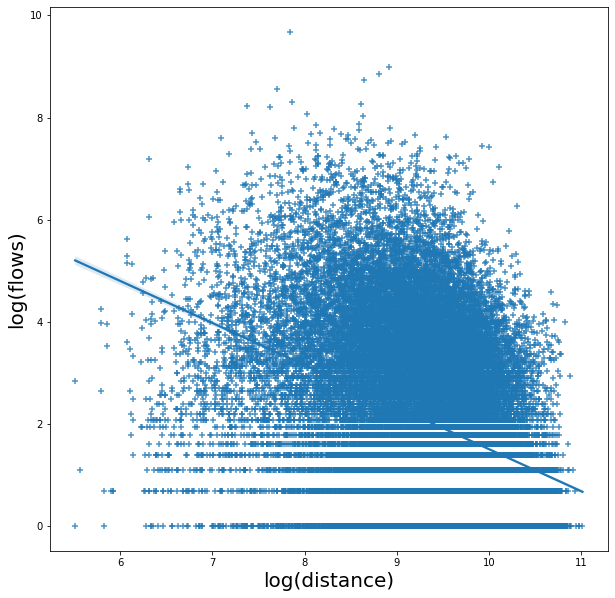

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




data0=data

for index, row in data.iterrows():
    if row["flows"]==0 or row["distance"]==0:
        data.drop(index, inplace=True)


import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2




from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE


import numpy as np
#subset the dataframe to the flows we want
data_flows = data[["flows", "distance"]]
#remove all 0 values (logarithms can't deal with 0 values)
data_flows = data_flows[(data_flows!=0).all(1)]

#print(data_flows)


#extract the x and y converting to log
x = np.log(data_flows["distance"])
y = np.log(data_flows["flows"])

#create the subplot
fig, ax = plt.subplots(figsize = (10,10))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("log(distance)", fontsize = 20)
ax.set_ylabel("log(flows)", fontsize = 20)
plt.savefig('./part_dat.png')






import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# only beta
#take the variables and produce logarithms of them
x_variables = ["population","jobs","distance",]
log_x_vars = []
for x in x_variables:
    data[f"log_{x}"] = np.log(data[x])
    print("finished")
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~   log_distance '

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=data,
                  family=sm.families.Poisson()).fit()
print(uncosim.summary())




K = uncosim.params[0]

beta = -uncosim.params[1]
alpha=1
gamma=1

data["unconstrainedEst2"] = np.exp(K 
                                       + alpha*data["log_population"] 
                                       + gamma*data["log_jobs"] 
                                       -beta*data["log_distance"])
print(data["unconstrainedEst2"])
#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
data["fitted"] = predictions_summary_frame["mean"]


#round the numbers so that we don't get a half of a person
data["unconstrainedEst2"] = round(data["unconstrainedEst2"], 0)
#convert to integers
data["unconstrainedEst2"] = data["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(data["unconstrainedEst2"])


RSqaured=CalcRSqaured(data["flows"], data["unconstrainedEst2"])
print("RSqaured is ",RSqaured)


RMSE=CalcRMSE(data["flows"], data["unconstrainedEst2"])
print("RMSE is ",RMSE)

